## <span style="font-family:Palatino Linotype"><font color='teal'>Correlations on Grit and Academic Performance</font>
### <span style="font-family:Palatino Linotype"><font color='teal'>Paolo G. Hilado</font></span> 

<span><font color='steelblue'>Situationer:</font></span>  Inspired by related literatures showing that Grit is a determinant of being successful in life, a company wishes to explore whether the same variable correlates with the work performance of its employees. Using the standardized instrument to measure Grit and Work Performance, collected data is made available for exploratory analysis to check whether a significant relationship exists between said variables.

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data Frame and check its information (we have 205 rows and 3 columns)
df = pd.read_excel("GritPerf.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  205 non-null    int64  
 1   Grit        200 non-null    float64
 2   Perf        200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.9 KB


In [3]:
# Check out the rows with missing cases; they don't bring any relevance thus need to remove it. 
df[df.isnull().any(axis=1)]

,Unnamed: 0,Grit,Perf
5,6,NaN,NaN
8,9,NaN,NaN
16,17,NaN,NaN
23,24,NaN,NaN
29,30,NaN,NaN


In [4]:
# Deal with the missing cases
df = df.dropna()
df = df.iloc[:,1:]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Grit    200 non-null    float64
 1   Perf    200 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


In [5]:
# Explore data if it meets assumptions for correlations
# Check the p-value of the aderson darling test at 5% significance level
ad = df.apply(scs.anderson, axis = 0)
print("Grit p-value:", ad.iloc[1,0][2])
print("Performance p-value:", ad.iloc[1,1][2])
print("Anderson Darling Statistic shows it is approx. normal")

Grit p-value: 0.772
Performance p-value: 0.772
Anderson Darling Statistic shows it is approx. normal


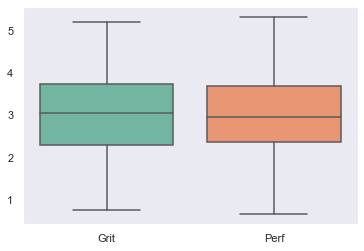

In [6]:
# Check Visualizations of the variables

sns.set_theme(style="dark")
ax = sns.boxplot(data = df, palette = 'Set2')

QQ-plot of Variable Grit


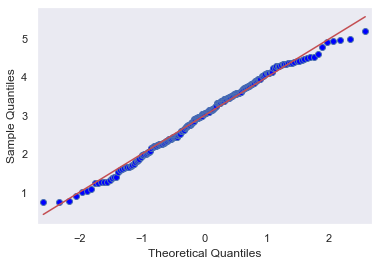

In [22]:
# Let us check the qq-plots for variable Grit
print("QQ-plot of Variable Grit")
sm.qqplot(df['Grit'], line ='s'); 

QQ-plot of Variable Work Performance


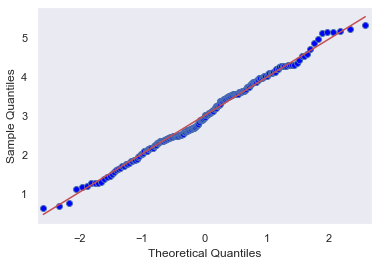

In [23]:
# Let us check the qq-plots for variable Work Performance
print("QQ-plot of Variable Work Performance")
sm.qqplot(df['Perf'], line ='s');

In [35]:
# Having been informed that we have distributions that are approximately normal
# let us use the parametric approach for correlations
corr = scs.pearsonr(df['Grit'], df['Perf'])
print("Pearson r:", np.round(corr[0],2), "R-squared", np.round(corr[0]**2,2), "p-value:", np.round(corr[1],2))

Pearson r: 0.47 R-squared 0.22 p-value: 0.0


<span><font color='steelblue'>Result:</font></span> A correlation analysis was conducted between the variables Grit and Work Performance. It can be observed that there is a moderate positive (r = 0.47) relationship between the aforesaid variables; an increase in Grit is likely to lead to an increase in Work Performance and vice versa. The variance explained between these variables is at 0.22. Moreover, it can also be observed that the said relationship is statistically significant (p-value <0.05) thus informing us that observations of the sample may also hold true with the population. 